In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("datasets/effectifs.csv",sep=';')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
df.head()

,annee,patho_niv1,patho_niv2,patho_niv3,top,cla_age_5,sexe,region,dept,Ntop,Npop,prev,Niveau prioritaire,libelle_classe_age,libelle_sexe,tri
0,2023,Maladies inflammatoires ou rares ou infection VIH,Maladies rares,Mucoviscidose,RAR_MUC_IND,95et+,9,28,999,NaN,15550,NaN,3,plus de 95 ans,tous sexes,78.00
1,2023,Maladies inflammatoires ou rares ou infection VIH,Maladies rares,Mucoviscidose,RAR_MUC_IND,95et+,9,32,59,NaN,8460,NaN,3,plus de 95 ans,tous sexes,78.00
2,2023,Maladies inflammatoires ou rares ou infection VIH,Maladies rares,Mucoviscidose,RAR_MUC_IND,95et+,9,32,60,NaN,2470,NaN,3,plus de 95 ans,tous sexes,78.00
3,2023,Maladies inflammatoires ou rares ou infection VIH,Maladies rares,Mucoviscidose,RAR_MUC_IND,95et+,9,32,62,NaN,5010,NaN,3,plus de 95 ans,tous sexes,78.00
4,2023,Maladies inflammatoires ou rares ou infection VIH,Maladies rares,Mucoviscidose,RAR_MUC_IND,95et+,9,32,80,NaN,2220,NaN,3,plus de 95 ans,tous sexes,78.00


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5216400 entries, 0 to 5216399
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   annee               int64  
 1   patho_niv1          object 
 2   patho_niv2          object 
 3   patho_niv3          object 
 4   top                 object 
 5   cla_age_5           object 
 6   sexe                int64  
 7   region              int64  
 8   dept                object 
 9   Ntop                float64
 10  Npop                int64  
 11  prev                float64
 12  Niveau prioritaire  object 
 13  libelle_classe_age  object 
 14  libelle_sexe        object 
 15  tri                 float64
dtypes: float64(3), int64(4), object(9)
memory usage: 636.8+ MB


In [5]:
df.describe()

,annee,sexe,region,Ntop,Npop,prev,tri
count,5216400.00,5216400.00,5216400.00,3833965.00,5216400.00,3833965.00,5148360.00
mean,2019.00,4.08,51.05,5544.95,103235.19,6.22,39.41
std,2.58,3.58,29.45,159030.85,989288.23,15.95,22.52
min,2015.00,1.00,1.00,10.00,10.00,0.00,1.00
25%,2017.00,1.00,27.00,50.00,7710.00,0.27,20.00
50%,2019.00,2.00,52.00,200.00,17040.00,0.98,39.00
75%,2021.00,9.00,76.00,950.00,42670.00,4.21,58.00
max,2023.00,9.00,99.00,68833510.00,68833510.00,100.00,78.00


In [6]:
# verifier les valeurs uniques dans chaque colonne
for col in df.columns:
    print(f"Colonne '{col}' : {df[col].unique()} valeurs uniques") 
    

Colonne 'annee' : [2023 2015 2017 2016 2018 2020 2019 2022 2021] valeurs uniques
Colonne 'patho_niv1' : ['Maladies inflammatoires ou rares ou infection VIH'
 'Maladies neurologiques' 'Maladies psychiatriques'
 'Pas de pathologie repérée, traitement, maternité, hospitalisation ou traitement antalgique ou anti-inflammatoire'
 'Total consommants tous régimes'
 'Traitements du risque vasculaire (hors pathologies)'
 'Traitements psychotropes (hors pathologies)'
 'Maladies cardioneurovasculaires'
 'Maladies respiratoires chroniques (hors mucoviscidose)'
 'Traitements antalgiques ou anti-inflammatoires (hors pathologies, traitements, maternité ou hospitalisations)'
 'Maladies du foie ou du pancréas (hors mucoviscidose)'
 'Maternité (avec ou sans pathologies)'
 'Insuffisance rénale chronique terminale'
 'Hospitalisations hors pathologies repérées (avec ou sans pathologies, traitements ou maternité)'
 'Cancers' 'Diabète' 'Hospitalisation pour Covid-19'
 "Affections de longue durée (dont 31 et 3

In [7]:
# On va supprimer toutes les lignes qui contiennentau moins un de ces cas dans toutes les colonnes: 'Pas de pathologie repérée, traitement, maternité, hospitalisation ou traitement antalgique ou anti-inflammatoire' , 'Total consommants tous régimes' , 'Pas de pathologie repérée, traitement, maternité, hospitalisation ou traitement antalgique ou anti-inflammatoire' 
# ,  'Pas de pathologie repérée, traitement, maternité, hospitalisation ou traitement antalgique ou anti-inflammatoire' ,  'Total consommants tous régimes' , 'tsage' , '9' , '99' , '999' , 'tous âges' , ,'tous sexes'.

values_to_remove = [
    "Pas de pathologie repérée",
    "Total consommants tous régimes",
    "Pas de pathologie repérée, traitement, maternité, hospitalisation ou traitement antalgique ou anti-inflammatoire",
    "Hospitalisation pour Covid-19",
    "tsage",
    "tous âges",
    "tous sexes",
    "9", "99", "999"
]

# On convertit tout en string et on nettoie les espaces
df_str = df.astype(str).apply(lambda col: col.str.strip().str.lower())

# Filtre : supprimer les lignes contenant n'importe lequel des patterns
mask = df_str.apply(
    lambda col: col.str.contains("|".join(values_to_remove), na=False)
).any(axis=1)

df_clean = df[~mask]
df_clean = df_clean.reset_index(drop=True)


In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404694 entries, 0 to 404693
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   annee               404694 non-null  int64  
 1   patho_niv1          404694 non-null  object 
 2   patho_niv2          367652 non-null  object 
 3   patho_niv3          326949 non-null  object 
 4   top                 404694 non-null  object 
 5   cla_age_5           404694 non-null  object 
 6   sexe                404694 non-null  int64  
 7   region              404694 non-null  int64  
 8   dept                404694 non-null  object 
 9   Ntop                245831 non-null  float64
 10  Npop                404694 non-null  int64  
 11  prev                245831 non-null  float64
 12  Niveau prioritaire  397015 non-null  object 
 13  libelle_classe_age  404694 non-null  object 
 14  libelle_sexe        404694 non-null  object 
 15  tri                 397015 non-nul

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5216400 entries, 0 to 5216399
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   annee               int64  
 1   patho_niv1          object 
 2   patho_niv2          object 
 3   patho_niv3          object 
 4   top                 object 
 5   cla_age_5           object 
 6   sexe                int64  
 7   region              int64  
 8   dept                object 
 9   Ntop                float64
 10  Npop                int64  
 11  prev                float64
 12  Niveau prioritaire  object 
 13  libelle_classe_age  object 
 14  libelle_sexe        object 
 15  tri                 float64
dtypes: float64(3), int64(4), object(9)
memory usage: 636.8+ MB


In [10]:
(df_clean.apply(lambda x: x.astype(str).str.strip() == "")).sum()

annee                 0
patho_niv1            0
patho_niv2            0
patho_niv3            0
top                   0
cla_age_5             0
sexe                  0
region                0
dept                  0
Ntop                  0
Npop                  0
prev                  0
Niveau prioritaire    0
libelle_classe_age    0
libelle_sexe          0
tri                   0
dtype: int64

In [11]:
total_nulls = df_clean.isna().sum().sum()
print(f"Nombre total de valeurs manquantes : {total_nulls}")

Nombre total de valeurs manquantes : 447871


In [12]:
df_clean["Ntop"] = df_clean["Ntop"].fillna(5)

#reformate l'age class label pour permettre un tri correct après
df_clean["libelle_classe_age"] = df_clean["libelle_classe_age"].replace(
    {"de 5 à 9 ans": "de 05 à 9 ans"}
)


In [13]:
patho_niveau2 = [
    'Maladies rares',
    'Autres affections neurologiques',
    'Autres troubles psychiatriques',
    'Déficience mentale',
    'Traitements antihypertenseurs (hors pathologies)',
    'Traitements antidépresseurs ou thymorégulateurs (hors pathologies)',
    'Traitements anxiolytiques (hors pathologies)',
    'Infection par le VIH',
    'Traitements hypolipémiants (hors pathologies)',
    'Troubles addictifs',
    'Troubles névrotiques et de l\'humeur',
    'Troubles psychiatriques débutant dans l\'enfance',
    'Troubles psychotiques',
    'Maladies inflammatoires chroniques',
    'Maladie coronaire',
    'Maladie valvulaire',
    'Insuffisance cardiaque',
    'Artériopathie périphérique',
    'Autres affections cardiovasculaires',
    'Démences (dont maladie d\'Alzheimer)',
    'Lésion médullaire',
    'Sclérose en plaques',
    'Épilepsie',
    'Maladie de Parkinson',
    'Myopathie ou myasthénie',
    'Embolie pulmonaire',
    'Maladies respiratoires chroniques (hors mucoviscidose)',
    'Traitements antalgiques ou anti-inflammatoires (hors pathologies, traitements, maternité ou hospitalisations)',
    'Maladies du foie ou du pancréas (hors mucoviscidose)',
    'Maternité (avec ou sans pathologies)',
    'Traitements hypnotiques (hors pathologies)',
    'Traitements neuroleptiques (hors pathologies)',
    'Accident vasculaire cérébral',
    'Transplantation rénale',
    'Hospitalisations hors pathologies repérées (avec ou sans pathologies, traitements ou maternité)',
    'Cancer du sein de la femme',
    'Diabète',
    'Cancer de la prostate',
    'Cancer colorectal',
    'Dialyse chronique',
    'Suivi de transplantation rénale',
    'Affections de longue durée (dont 31 et 32) pour d\'autres causes',
    'Autres cancers',
    'Troubles du rythme ou de la conduction cardiaque',
    'Cancer bronchopulmonaire'
]


labels_simplifies = [
    "Maladies rares",
    "Autres affections neuro",
    "Autres troubles psy",
    "Déficience mentale",
    "Antihypertenseurs (hors patho)",
    "Antidépresseurs/thymorégulateurs (hors patho)",
    "Anxiolytiques (hors patho)",
    "Infection VIH",
    "Hypolipémiants (hors patho)",
    "Troubles addictifs",
    "Troubles névrotiques / humeur",
    "Troubles psy enfance",
    "Troubles psychotiques",
    "Maladies inflammatoires chroniques",
    "Maladie coronaire",
    "Maladie valvulaire",
    "Insuffisance cardiaque",
    "Artériopathie périphérique",
    "Autres affections cardio",
    "Démences (Alzheimer inclus)",
    "Lésion médullaire",
    "Sclérose en plaques",
    "Épilepsie",
    "Maladie de Parkinson",
    "Myopathie / myasthénie",
    "Embolie pulmonaire",
    "Maladies respiratoires chroniques",
    "Antalgiques/anti-inflammatoires (hors patho)",
    "Maladies du foie/pancréas",
    "Maternité",
    "Hypnotiques (hors patho)",
    "Neuroleptiques (hors patho)",
    "AVC",
    "Transplantation rénale",
    "Hospitalisations hors patho",
    "Cancer du sein (f)",
    "Diabète",
    "Cancer de la prostate",
    "Cancer colorectal",
    "Dialyse chronique",
    "Suivi transplantation rénale",
    "ALD autres",
    "Autres cancers",
    "Troubles du rythme / conduction",
    "Cancer bronchopulmonaire"
]


mapping_labels = {
    "Maladies rares": "Maladies rares",
    "Autres affections neurologiques": "Autres affections neuro",
    "Autres troubles psychiatriques": "Autres troubles psy",
    "Déficience mentale": "Déficience mentale",
    "Traitements antihypertenseurs (hors pathologies)": "Antihypertenseurs (hors patho)",
    "Traitements antidépresseurs ou thymorégulateurs (hors pathologies)": "Antidépresseurs/thymorégulateurs (hors patho)",
    "Traitements anxiolytiques (hors pathologies)": "Anxiolytiques (hors patho)",
    "Infection par le VIH": "Infection VIH",
    "Traitements hypolipémiants (hors pathologies)": "Hypolipémiants (hors patho)",
    "Troubles addictifs": "Troubles addictifs",
    "Troubles névrotiques et de l'humeur": "Troubles névrotiques / humeur",
    "Troubles psychiatriques débutant dans l'enfance": "Troubles psy enfance",
    "Troubles psychotiques": "Troubles psychotiques",
    "Maladies inflammatoires chroniques": "Maladies inflammatoires chroniques",
    "Maladie coronaire": "Maladie coronaire",
    "Maladie valvulaire": "Maladie valvulaire",
    "Insuffisance cardiaque": "Insuffisance cardiaque",
    "Artériopathie périphérique": "Artériopathie périphérique",
    "Autres affections cardiovasculaires": "Autres affections cardio",
    "Démences (dont maladie d'Alzheimer)": "Démences (Alzheimer inclus)",
    "Lésion médullaire": "Lésion médullaire",
    "Sclérose en plaques": "Sclérose en plaques",
    "Épilepsie": "Épilepsie",
    "Maladie de Parkinson": "Maladie de Parkinson",
    "Myopathie ou myasthénie": "Myopathie / myasthénie",
    "Embolie pulmonaire": "Embolie pulmonaire",
    "Maladies respiratoires chroniques (hors mucoviscidose)": "Maladies respiratoires chroniques",
    "Traitements antalgiques ou anti-inflammatoires (hors pathologies, traitements, maternité ou hospitalisations)": "Antalgiques/anti-inflammatoires (hors patho)",
    "Maladies du foie ou du pancréas (hors mucoviscidose)": "Maladies du foie/pancréas",
    "Maternité (avec ou sans pathologies)": "Maternité",
    "Traitements hypnotiques (hors pathologies)": "Hypnotiques (hors patho)",
    "Traitements neuroleptiques (hors pathologies)": "Neuroleptiques (hors patho)",
    "Accident vasculaire cérébral": "AVC",
    "Transplantation rénale": "Transplantation rénale",
    "Hospitalisations hors pathologies repérées (avec ou sans pathologies, traitements ou maternité)": "Hospitalisations hors patho",
    "Cancer du sein de la femme": "Cancer du sein (f)",
    "Diabète": "Diabète",
    "Cancer de la prostate": "Cancer de la prostate",
    "Cancer colorectal": "Cancer colorectal",
    "Dialyse chronique": "Dialyse chronique",
    "Suivi de transplantation rénale": "Suivi transplantation rénale",
    "Affections de longue durée (dont 31 et 32) pour d'autres causes": "ALD autres",
    "Autres cancers": "Autres cancers",
    "Troubles du rythme ou de la conduction cardiaque": "Troubles du rythme / conduction",
    "Cancer bronchopulmonaire": "Cancer bronchopulmonaire"
}

df_clean["patho_niv2_simplifie"] = df_clean["patho_niv2"].map(mapping_labels)

In [14]:
df_clean.head()

,annee,patho_niv1,patho_niv2,patho_niv3,top,cla_age_5,sexe,region,dept,Ntop,Npop,prev,Niveau prioritaire,libelle_classe_age,libelle_sexe,tri,patho_niv2_simplifie
0,2023,Maladies neurologiques,NaN,NaN,NEU_CAT_CAT,00-04,1,27,21,40.00,12460,0.32,1,de 0 à 4 ans,hommes,8.00,NaN
1,2023,Maladies neurologiques,NaN,NaN,NEU_CAT_CAT,00-04,1,32,60,100.00,23100,0.41,1,de 0 à 4 ans,hommes,8.00,NaN
2,2023,Maladies neurologiques,NaN,NaN,NEU_CAT_CAT,00-04,1,44,54,70.00,15740,0.47,1,de 0 à 4 ans,hommes,8.00,NaN
3,2023,Maladies neurologiques,NaN,NaN,NEU_CAT_CAT,00-04,1,52,72,50.00,14050,0.37,1,de 0 à 4 ans,hommes,8.00,NaN
4,2023,Maladies neurologiques,NaN,NaN,NEU_CAT_CAT,00-04,1,53,22,50.00,13040,0.41,1,de 0 à 4 ans,hommes,8.00,NaN


In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404694 entries, 0 to 404693
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   annee                 404694 non-null  int64  
 1   patho_niv1            404694 non-null  object 
 2   patho_niv2            367652 non-null  object 
 3   patho_niv3            326949 non-null  object 
 4   top                   404694 non-null  object 
 5   cla_age_5             404694 non-null  object 
 6   sexe                  404694 non-null  int64  
 7   region                404694 non-null  int64  
 8   dept                  404694 non-null  object 
 9   Ntop                  404694 non-null  float64
 10  Npop                  404694 non-null  int64  
 11  prev                  245831 non-null  float64
 12  Niveau prioritaire    397015 non-null  object 
 13  libelle_classe_age    404694 non-null  object 
 14  libelle_sexe          404694 non-null  object 
 15  

In [19]:
df_clean.isna().sum()

annee                        0
patho_niv1                   0
patho_niv2               37042
patho_niv3               77745
top                          0
cla_age_5                    0
sexe                         0
region                       0
dept                         0
Ntop                         0
Npop                         0
prev                    158863
Niveau prioritaire        7679
libelle_classe_age           0
libelle_sexe                 0
tri                       7679
patho_niv2_simplifie     48527
dtype: int64

In [20]:
df_clean = df_clean[["annee" , "patho_niv1" ,"patho_niv2_simplifie","patho_niv3","libelle_classe_age","sexe","dept", "region","Ntop","Npop","prev","top"]]
df_clean.to_parquet("datasets/df_cleaned.parquet")

In [21]:
# Récupérer toutes les valeurs uniques (non vides) de patho_niv1 pour pouvoir les appeller plus tard
toutes_les_pathos = df_clean["patho_niv1"].dropna().unique()

# Afficher le résultat
print(toutes_les_pathos)

['Maladies neurologiques' 'Maladies psychiatriques'
 'Pas de pathologie repérée, traitement, maternité, hospitalisation ou traitement antalgique ou anti-inflammatoire'
 'Total consommants tous régimes'
 'Traitements du risque vasculaire (hors pathologies)'
 'Traitements psychotropes (hors pathologies)'
 'Maladies inflammatoires ou rares ou infection VIH'
 'Maladies cardioneurovasculaires'
 'Maladies respiratoires chroniques (hors mucoviscidose)'
 'Traitements antalgiques ou anti-inflammatoires (hors pathologies, traitements, maternité ou hospitalisations)'
 'Maladies du foie ou du pancréas (hors mucoviscidose)'
 'Maternité (avec ou sans pathologies)'
 'Insuffisance rénale chronique terminale'
 'Hospitalisations hors pathologies repérées (avec ou sans pathologies, traitements ou maternité)'
 'Cancers' 'Diabète'
 "Affections de longue durée (dont 31 et 32) pour d'autres causes"]


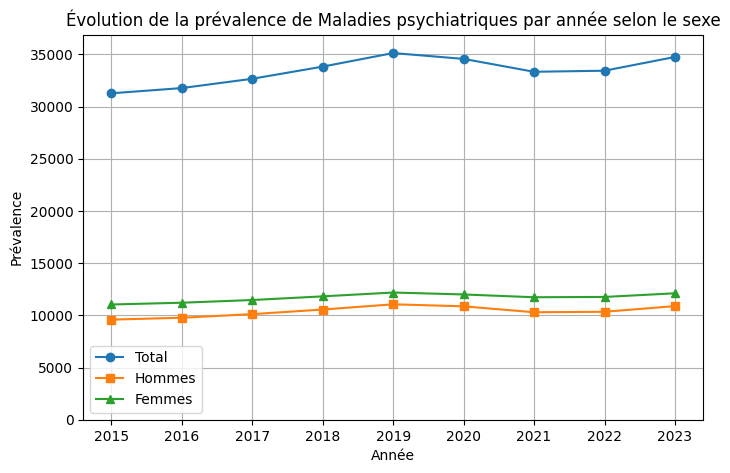

In [22]:
#########Graphique n1 de l'évolution de la prévalence par année selon le sexe pour des pathologies données#########

# Valeurs de filtre communes
vals = [
     #"Maladies neurologiques", 
    #"Traitements psychotropes (hors pathologies)"
    "Maladies psychiatriques", 
    # "Affections de longue durée (dont 31 et 32) pour d'autres causes"
]

top = ["PSY_CAT_CAT"]

# Fonction pour calculer la somme de prévalence par année
def somme_preval_par_annee(df):
    return df.groupby("annee")["prev"].sum()

# Filtrer pour sexe = 9 (total ou autre catégorie)
df_sexe9 = df[
    df["patho_niv1"].isin(vals) &
    df["top"].isin(top)
]

# Filtrer pour sexe = 1 (hommes)
df_hommes = df[
    df["patho_niv1"].isin(vals) &
    df["sexe"].isin([1]) &
    df["top"].isin(top)
]

# Filtrer pour sexe = 2 (femmes)
df_femmes = df[
     df["patho_niv1"].isin(vals) &
     df["sexe"].isin([2]) &
     df["top"].isin(top) 
]

# Calcul des séries
serie_sexe9 = somme_preval_par_annee(df_sexe9)
serie_hommes = somme_preval_par_annee(df_hommes)
serie_femmes = somme_preval_par_annee(df_femmes)

# Tracer les trois courbes
plt.figure(figsize=(8,5))
plt.plot(serie_sexe9.index, serie_sexe9.values, marker='o', label='Total')
plt.plot(serie_hommes.index, serie_hommes.values, marker='s', label='Hommes')
plt.plot(serie_femmes.index, serie_femmes.values, marker='^', label='Femmes')

# Génération du titre
titre = "Évolution de la prévalence de " + ", ".join(vals) + " par année selon le sexe"

plt.xlabel("Année")
plt.ylabel("Prévalence")
plt.title(titre) 
plt.grid(True)
plt.ylim(0, max(serie_sexe9.max(), serie_hommes.max(), serie_femmes.max()) * 1.05)
plt.legend()
plt.show()
